# The Matrix Inverse

In arithmetic, the inverse of a number is what you multiply it by to get 1 (e.g., the inverse of 2 is 1/2, because $2 \times \frac{1}{2} = 1$).

The **inverse of a matrix**, denoted as $A^{-1}$, is the matrix that, when multiplied by the original matrix $A$, results in the **identity matrix** ($I$).  

$ A \cdot A^{-1} = I $

Geometrically, the inverse matrix corresponds to a linear transformation that **"undoes"** the transformation of the original matrix, returning the space to its initial state.

Let's consider our transformation matrix from before:  

$ A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} $  

This matrix transforms the unit square into a parallelogram. The inverse matrix, $A^{-1}$, will be the transformation that maps that parallelogram back into the original unit square.

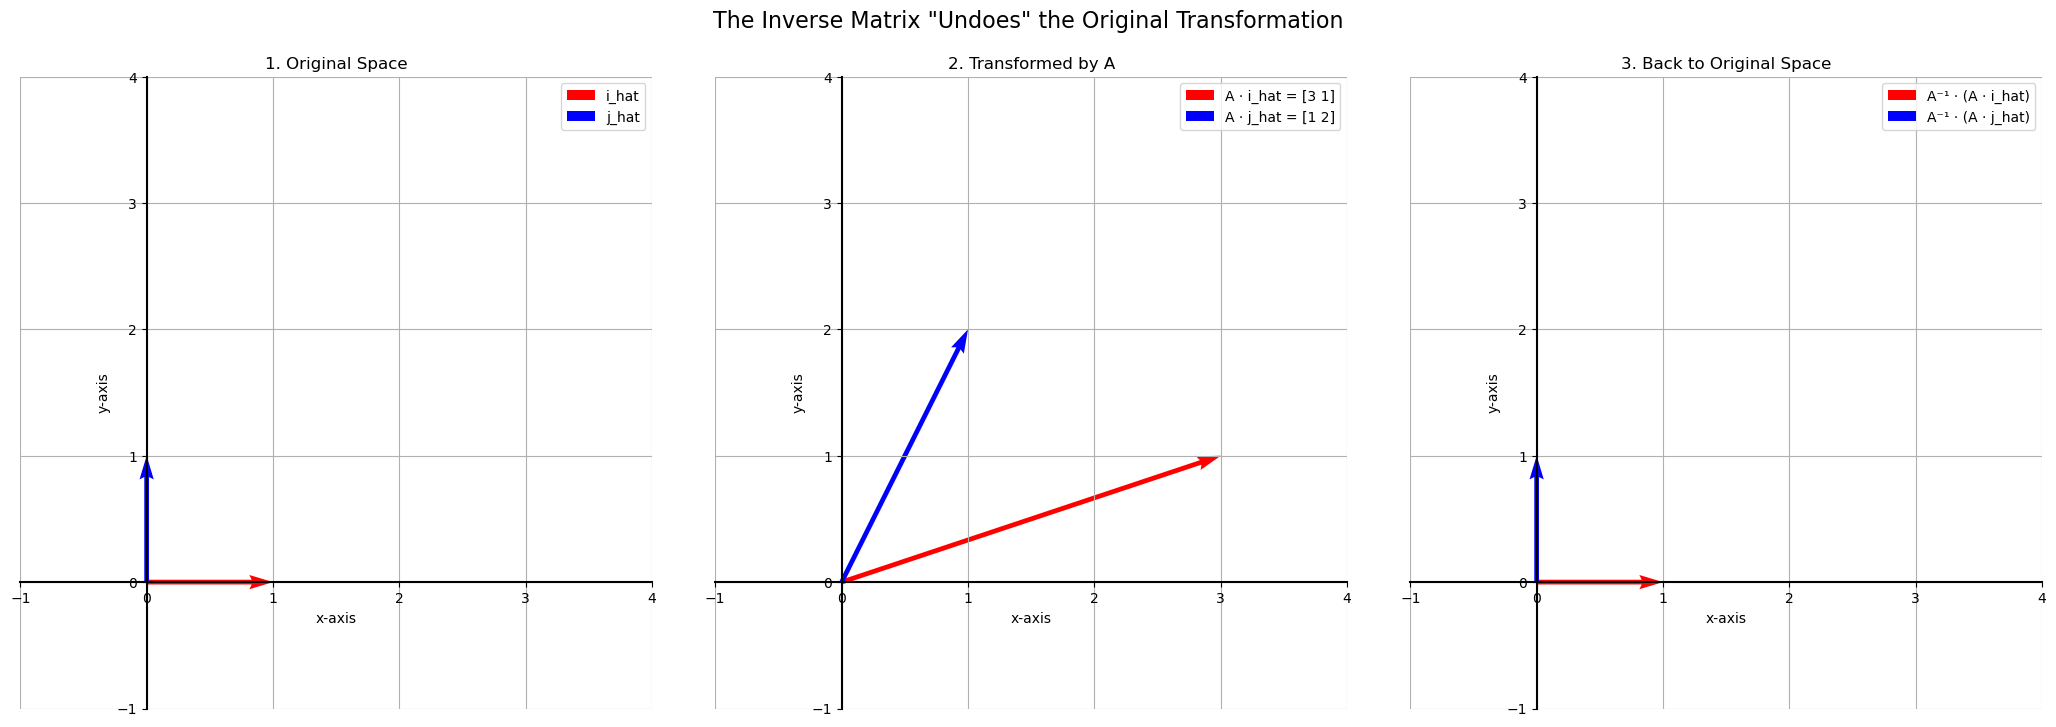

In [2]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the transformation matrix and its inverse ---
A = np.array([[3, 1], [1, 2]])
A_inv = np.linalg.inv(A)

# --- Define the original basis vectors ---
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

# --- Apply the transformations ---
# 1. Transform the basis with A
i_hat_A = A @ i_hat
j_hat_A = A @ j_hat

# 2. Apply the inverse transformation to the result
i_hat_inv_A = A_inv @ i_hat_A
j_hat_inv_A = A_inv @ j_hat_A

# --- Create the plot ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle('The Inverse Matrix "Undoes" the Original Transformation', fontsize=16, y=1.02)

# --- Plot 1: Original Space ---
ax1.quiver(0, 0, i_hat[0], i_hat[1], angles='xy', scale_units='xy', scale=1, color='red', label='i_hat')
ax1.quiver(0, 0, j_hat[0], j_hat[1], angles='xy', scale_units='xy', scale=1, color='blue', label='j_hat')
ax1.set_title('1. Original Space')

# --- Plot 2: After Transformation A ---
# ADDED LABELS HERE TO FIX THE WARNING
ax2.quiver(0, 0, i_hat_A[0], i_hat_A[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'A · i_hat = {i_hat_A}')
ax2.quiver(0, 0, j_hat_A[0], j_hat_A[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'A · j_hat = {j_hat_A}')
ax2.set_title('2. Transformed by A')

# --- Plot 3: After Applying the Inverse A⁻¹ ---
ax3.quiver(0, 0, i_hat_inv_A[0], i_hat_inv_A[1], angles='xy', scale_units='xy', scale=1, color='red', label='A⁻¹ · (A · i_hat)')
ax3.quiver(0, 0, j_hat_inv_A[0], j_hat_inv_A[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A⁻¹ · (A · j_hat)')
ax3.set_title('3. Back to Original Space')


# --- Format all plots ---
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

---

## How to Find the Inverse Matrix

There are two main ways to find the inverse of a matrix by hand. The first is conceptual, and the second is a practical algorithm.

### Method 1: The Conceptual Approach (Solving a System)

To find the entries of the inverse, we can set up and solve a system of linear equations. Let our original matrix be $A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix}$ and its unknown inverse be $A^{-1} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$.

We know their product must be the identity matrix:  

$
\begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} \begin{bmatrix} a & b \\ c & d \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$  

This creates a system of four equations, which can be solved for a, b, c, and d. While this works for a 2x2 matrix, it quickly becomes unmanageable for larger matrices.

---
### Method 2: The Practical Algorithm (Gauss-Jordan Elimination)

This is the standard, scalable method for finding an inverse.

1.  Create an **augmented matrix** by placing your original matrix `A` on the left and the **identity matrix `I`** of the same size on the right. Our goal is to transform `[A | I]`.
2.  Use **row operations** to transform the left side (`A`) into the identity matrix.
3.  Apply the exact same row operations to the right side (`I`) simultaneously.
4.  When the left side becomes the identity matrix, the right side will have become the **inverse matrix, `A⁻¹`**. The final form will be `[I | A⁻¹]`.

**Example:** Let's find the inverse of $ A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} $.

**Step 1: Set up the augmented matrix.**  

> $
\left[
\begin{array}{cc|cc}
3 & 1 & 1 & 0 \\
1 & 2 & 0 & 1
\end{array}
\right]
$  

**Step 2: Perform row operations to get RREF on the left side.**

* `R1 = R1 / 3` (Normalize the first pivot)

> $
\left[
\begin{array}{cc|cc}
1 & 1/3 & 1/3 & 0 \\
1 & 2 & 0 & 1
\end{array}
\right]
$

* `R2 = R2 - R1` (Create a zero below the first pivot)

> $
\left[
\begin{array}{cc|cc}
1 & 1/3 & 1/3 & 0 \\
0 & 5/3 & -1/3 & 1
\end{array}
\right]
$

* `R2 = R2 * (3/5)` (Normalize the second pivot)

> $
\left[
\begin{array}{cc|cc}
1 & 1/3 & 1/3 & 0 \\
0 & 1 & -1/5 & 3/5
\end{array}
\right]
$

* `R1 = R1 - (1/3)*R2` (Create a zero above the second pivot)

> $
\left[
\begin{array}{cc|cc}
1 & 0 & 2/5 & -1/5 \\
0 & 1 & -1/5 & 3/5
\end{array}
\right]
$

**Step 3: Read the inverse matrix from the right side.**

The left side is now the identity matrix. The right side is our inverse.  

$
A^{-1} = \begin{bmatrix} 2/5 & -1/5 \\ -1/5 & 3/5 \end{bmatrix}
$

---
## When Does an Inverse Not Exist?

A crucial point in linear algebra is that **not all matrices have an inverse**. A matrix can only be inverted if it is **non-singular**. If you try to perform Gauss-Jordan elimination on a singular matrix, you will find it impossible to get the identity matrix on the left side because you will end up with a row of all zeros.